<a href="https://colab.research.google.com/github/kalpitthakkar/3DVSS_2024/blob/main/InstantNGP_Colmap_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
from IPython.display import display

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Set up the environment

In [ ]:
WHEEL_PATH="/content/gdrive/MyDrive/3DVSS_24/wheelhouse" # @param {type: 'string'}
!mkdir -p ~/.config/pip
!rm ~/.config/pip/pip.conf
!echo "[global]" >> ~/.config/pip/pip.conf
if WHEEL_PATH!="":
  !echo "find-links = {WHEEL_PATH}" >> ~/.config/pip/pip.conf
else:
  display('!!!!ENTER WHEEL PATH!!!!!')

rm: cannot remove '/root/.config/pip/pip.conf': No such file or directory


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
!apt-get install colmap ffmpeg
!pip install pymeshlab
!pip install open3d

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
The following additional packages will be installed:
  libamd2 libcamd2 libccolamd2 libceres2 libcholmod3 libcolamd2 libcxsparse3 libevdev2
  libfreeimage3 libgflags2.2 libgoogle-glog0v5 libgudev-1.0-0 libinput-bin libinput10 libjxr0
  libmd4c0 libmetis5 libmtdev1 libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5
  libqt5widgets5 libraw20 libspqr2 libsuitesparseconfig5 libwacom-bin libwacom-common libwacom9
  libxcb-icccm4 libxcb-image0 libxcb-keysyms1 libxcb-render-util0 libxcb-util1 libxcb-xinerama0
  libxcb-xinput0 libxcb-xkb1 libxkbcommon-x11-0 qt5-gtk-platformtheme qttranslations5-l10n
Suggested packages:
  qt5-image-formats-plugins qtwayland5
The following NEW packages will be installed:
  colmap libamd2 libcamd2 libccolamd2 libceres2 libcholmod3 libcolamd2 libcxsparse3 libevdev2
  libfreeimage3 libgflags2.2 

In [ ]:
# @title Clone the repo, install Requirements
%cd /content
!git clone --recursive https://github.com/raipranav384/torch-ngp-col.git -q
%cd /content/torch-ngp-col
!pip install -r requirements.txt -q

/content
/content/torch-ngp-col
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.6/694.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.3/274.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 65.1 MB/s eta 0:00:00


In [ ]:
# @title Install the packages with pre-built wheels
!pip install tinycudann
!pip install raymarching --no-index
!pip install shencoder
!pip install freqencoder
!pip install gridencoder

Looking in links: /content/gdrive/MyDrive/3DVSS_24/wheelhouse
Processing /content/gdrive/MyDrive/3DVSS_24/wheelhouse/tinycudann-1.7-cp310-cp310-linux_x86_64.whl
Looking in links: /content/gdrive/MyDrive/3DVSS_24/wheelhouse
Processing /content/gdrive/MyDrive/3DVSS_24/wheelhouse/raymarching-0.0.0-cp310-cp310-linux_x86_64.whl
Looking in links: /content/gdrive/MyDrive/3DVSS_24/wheelhouse
Processing /content/gdrive/MyDrive/3DVSS_24/wheelhouse/shencoder-0.0.0-cp310-cp310-linux_x86_64.whl
Looking in links: /content/gdrive/MyDrive/3DVSS_24/wheelhouse
Processing /content/gdrive/MyDrive/3DVSS_24/wheelhouse/freqencoder-0.0.0-cp310-cp310-linux_x86_64.whl
Looking in links: /content/gdrive/MyDrive/3DVSS_24/wheelhouse
Processing /content/gdrive/MyDrive/3DVSS_24/wheelhouse/gridencoder-0.0.0-cp310-cp310-linux_x86_64.whl


# Upload & Preprocess the Video

In [ ]:
# @title Upload video file.
# @markdown Select a video file (.mp4, .mov, etc.) from your disk. This will upload it to the local Colab working directory.
from google.colab import files

uploaded = files.upload()
file_path = next(iter(uploaded.keys()))

StopIteration: 

In [ ]:
# @title OR Choose file location on gdrive
# @markdown Select a video file (.mp4, .mov, etc.) from your gdrive. This should be faster.
from google.colab import files

file_path="/content/gdrive/MyDrive/3DVSS_24/VID_20240530_151426924.mp4" # @param {type:'string'}

In [ ]:
# @title Flatten into images.
%cd /content
import cv2
import os

rgb_dir=os.path.join(os.path.dirname(file_path),'images')

print(rgb_dir)

# @markdown Flattens the video into images. The results will be saved to `images`.

# @markdown Adjust `max_scale` to something smaller for faster processing.
max_scale = 1.0  # @param {type:'number'}
# @markdown A smaller FPS will be much faster for bundle adjustment, but at the expensive of a lower sampling density for training. For the paper we used ~15 fps but we default to something lower here to get you started faster.
# @markdown If given an fps of -1 we will try to auto-compute it.
fps = -1  # @param {type:'number'}
target_num_frames = 100 # @param {type: 'number'}

cap = cv2.VideoCapture(file_path)
input_fps = cap.get(cv2.CAP_PROP_FPS)
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
rgb_raw_dir= os.path.join(os.path.dirname(file_path),'images/raw')

if num_frames < target_num_frames:
  raise RuntimeError(
      'The video is too short and has fewer frames than the target.')

if fps == -1:
  fps = int(target_num_frames / num_frames * input_fps)
  print(f"Auto-computed FPS = {fps}")

# @markdown Check this if you want to reprocess the frames.
overwrite = False  # @param {type:'boolean'}

if os.path.exists(os.path.join(rgb_dir,'1x')) and not overwrite:
  raise RuntimeError(
      f'The RGB frames have already been processed. Check `overwrite` and run again if you really meant to do this.')
else:
  filters = f"mpdecimate,setpts=N/FRAME_RATE/TB,scale=iw*{max_scale}:ih*{max_scale}"
  tmp_rgb_raw_dir = 'rgb-raw'
  out_pattern = str('rgb-raw/%06d.png')
  !mkdir -p "$tmp_rgb_raw_dir"
  !ffmpeg -i "$file_path" -r $fps -vf $filters "$out_pattern"
  !mkdir -p "$rgb_raw_dir"
  !rsync -av "$tmp_rgb_raw_dir/" "$rgb_raw_dir/"

/content
/content/gdrive/MyDrive/3DVSS_24/images
Auto-computed FPS = 4
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-l

In [ ]:
# @title Resize images into different scales.
# @markdown Here we save the input images at various resolutions (downsample by a factor of 1, 2, 4, 8). We use area relation interpolation to prevent moire artifacts.
import concurrent.futures
import numpy as np
import cv2
import imageio
from PIL import Image
from pathlib import Path


def save_image(path, image: np.ndarray) -> None:
  print(f'Saving {path}')
  if not path.parent.exists():
    path.parent.mkdir(exist_ok=True, parents=True)
  with path.open('wb') as f:
    image = Image.fromarray(np.asarray(image))
    image.save(f, format=path.suffix.lstrip('.'))


def image_to_uint8(image: np.ndarray) -> np.ndarray:
  """Convert the image to a uint8 array."""
  if image.dtype == np.uint8:
    return image
  if not issubclass(image.dtype.type, np.floating):
    raise ValueError(
        f'Input image should be a floating type but is of type {image.dtype!r}')
  return (image * 255).clip(0.0, 255).astype(np.uint8)


def make_divisible(image: np.ndarray, divisor: int) -> np.ndarray:
  """Trim the image if not divisible by the divisor."""
  height, width = image.shape[:2]
  if height % divisor == 0 and width % divisor == 0:
    return image

  new_height = height - height % divisor
  new_width = width - width % divisor

  return image[:new_height, :new_width]


def downsample_image(image: np.ndarray, scale: int) -> np.ndarray:
  """Downsamples the image by an integer factor to prevent artifacts."""
  if scale == 1:
    return image

  height, width = image.shape[:2]
  if height % scale > 0 or width % scale > 0:
    raise ValueError(f'Image shape ({height},{width}) must be divisible by the'
                     f' scale ({scale}).')
  out_height, out_width = height // scale, width // scale
  resized = cv2.resize(image, (out_width, out_height), cv2.INTER_AREA)
  return resized



image_scales = "1,2,4,8"  # @param {type: "string"}
image_scales = [int(x) for x in image_scales.split(',')]

tmp_rgb_dir = Path('rgb')

for image_path in Path(tmp_rgb_raw_dir).glob('*.png'):
  image = make_divisible(imageio.imread(image_path), max(image_scales))
  for scale in image_scales:
    save_image(
        tmp_rgb_dir / f'{scale}x/{image_path.stem}.png',
        image_to_uint8(downsample_image(image, scale)))

!rsync -av "$tmp_rgb_dir/" "$rgb_dir/"

<ipython-input-29-25a755ee15ef>:63: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



Saving rgb/1x/000057.png
Saving rgb/2x/000057.png
Saving rgb/4x/000057.png
Saving rgb/8x/000057.png
Saving rgb/1x/000024.png
Saving rgb/2x/000024.png
Saving rgb/4x/000024.png
Saving rgb/8x/000024.png
Saving rgb/1x/000036.png
Saving rgb/2x/000036.png
Saving rgb/4x/000036.png
Saving rgb/8x/000036.png
Saving rgb/1x/000010.png
Saving rgb/2x/000010.png
Saving rgb/4x/000010.png
Saving rgb/8x/000010.png
Saving rgb/1x/000100.png
Saving rgb/2x/000100.png
Saving rgb/4x/000100.png
Saving rgb/8x/000100.png
Saving rgb/1x/000056.png
Saving rgb/2x/000056.png
Saving rgb/4x/000056.png
Saving rgb/8x/000056.png
Saving rgb/1x/000004.png
Saving rgb/2x/000004.png
Saving rgb/4x/000004.png
Saving rgb/8x/000004.png
Saving rgb/1x/000095.png
Saving rgb/2x/000095.png
Saving rgb/4x/000095.png
Saving rgb/8x/000095.png
Saving rgb/1x/000094.png
Saving rgb/2x/000094.png
Saving rgb/4x/000094.png
Saving rgb/8x/000094.png
Saving rgb/1x/000032.png
Saving rgb/2x/000032.png
Saving rgb/4x/000032.png
Saving rgb/8x/000032.png


In [ ]:
# @title Run Colmap on the video & Convert to Nerf Dataset Format
# @markdown Select colmap parameters
%cd /content/torch-ngp-col
scale= 2 #@param {type:'number'}
match_method = 'sequential'# @param ["exhaustive","sequential","spatial","transitive","vocab_tree"]
images_path=os.path.join(os.path.dirname(file_path),f'images/{scale}x')
!python scripts/colmap2nerf.py --images {images_path} --run_colmap --colmap_matcher {match_method}

Streaming output truncated to the last 5000 lines.
  32  3.280119e+03    4.23e-02    9.13e+05   3.75e-01   6.39e-01  1.07e+06        1    7.46e-02    1.94e+00
  33  3.280081e+03    3.79e-02    8.58e+05   3.59e-01   6.41e-01  1.10e+06        1    7.71e-02    2.02e+00
  34  3.280047e+03    3.40e-02    8.08e+05   3.43e-01   6.43e-01  1.12e+06        1    6.05e-02    2.08e+00
  35  3.280017e+03    3.06e-02    7.61e+05   3.29e-01   6.45e-01  1.15e+06        1    6.87e-02    2.15e+00
  36  3.279989e+03    2.75e-02    7.17e+05   3.15e-01   6.46e-01  1.18e+06        1    7.28e-02    2.22e+00
  37  3.279965e+03    2.47e-02    6.76e+05   3.01e-01   6.48e-01  1.21e+06        1    7.02e-02    2.29e+00
  38  3.279942e+03    2.22e-02    6.38e+05   2.88e-01   6.49e-01  1.24e+06        1    8.15e-02    2.37e+00
  39  3.279922e+03    2.00e-02    6.02e+05   2.75e-01   6.50e-01  1.28e+06        1    7.46e-02    2.44e+00
  40  3.279905e+03    1.80e-02    5.68e+05   2.63e-01   6.51e-01  1.31e+06        1  

# Run Instant-NGP (Torch-NGP)

In [ ]:
%cd /content/torch-ngp-col/
# @title Some parameter setup
import torch
import argparse

from nerf.provider import NeRFDataset
from nerf.gui import NeRFGUI
# from nerf.utils import *

from functools import partial
from loss import huber_loss

#torch.autograd.set_detect_anomaly(True)


parser = argparse.ArgumentParser()
parser.add_argument('path', type=str)
parser.add_argument('-O', action='store_true', help="equals --fp16 --cuda_ray --preload")
parser.add_argument('--test', action='store_true', help="test mode")
parser.add_argument('--workspace', type=str, default='workspace')
parser.add_argument('--seed', type=int, default=0)

### training options
parser.add_argument('--iters', type=int, default=30000, help="training iters")
parser.add_argument('--lr', type=float, default=1e-2, help="initial learning rate")
parser.add_argument('--ckpt', type=str, default='latest')
parser.add_argument('--num_rays', type=int, default=4096, help="num rays sampled per image for each training step")
parser.add_argument('--cuda_ray', action='store_true', help="use CUDA raymarching instead of pytorch")
parser.add_argument('--max_steps', type=int, default=1024, help="max num steps sampled per ray (only valid when using --cuda_ray)")
parser.add_argument('--num_steps', type=int, default=512, help="num steps sampled per ray (only valid when NOT using --cuda_ray)")
parser.add_argument('--upsample_steps', type=int, default=0, help="num steps up-sampled per ray (only valid when NOT using --cuda_ray)")
parser.add_argument('--update_extra_interval', type=int, default=16, help="iter interval to update extra status (only valid when using --cuda_ray)")
parser.add_argument('--max_ray_batch', type=int, default=4096, help="batch size of rays at inference to avoid OOM (only valid when NOT using --cuda_ray)")
parser.add_argument('--patch_size', type=int, default=1, help="[experimental] render patches in training, so as to apply LPIPS loss. 1 means disabled, use [64, 32, 16] to enable")

### network backbone options
parser.add_argument('--fp16', action='store_true', help="use amp mixed precision training")
parser.add_argument('--ff', action='store_true', help="use fully-fused MLP")
parser.add_argument('--tcnn', action='store_true', help="use TCNN backend")

### dataset options
parser.add_argument('--color_space', type=str, default='srgb', help="Color space, supports (linear, srgb)")
parser.add_argument('--preload', action='store_true', help="preload all data into GPU, accelerate training but use more GPU memory")
# (the default value is for the fox dataset)
parser.add_argument('--bound', type=float, default=2, help="assume the scene is bounded in box[-bound, bound]^3, if > 1, will invoke adaptive ray marching.")
parser.add_argument('--scale', type=float, default=0.33, help="scale camera location into box[-bound, bound]^3")
parser.add_argument('--offset', type=float, nargs='*', default=[0, 0, 0], help="offset of camera location")
parser.add_argument('--dt_gamma', type=float, default=1/128, help="dt_gamma (>=0) for adaptive ray marching. set to 0 to disable, >0 to accelerate rendering (but usually with worse quality)")
parser.add_argument('--min_near', type=float, default=0.2, help="minimum near distance for camera")
parser.add_argument('--density_thresh', type=float, default=10, help="threshold for density grid to be occupied")
parser.add_argument('--bg_radius', type=float, default=-1, help="if positive, use a background model at sphere(bg_radius)")

### GUI options
parser.add_argument('--gui', action='store_true', help="start a GUI")
parser.add_argument('--W', type=int, default=1920, help="GUI width")
parser.add_argument('--H', type=int, default=1080, help="GUI height")
parser.add_argument('--radius', type=float, default=5, help="default GUI camera radius from center")
parser.add_argument('--fovy', type=float, default=50, help="default GUI camera fovy")
parser.add_argument('--max_spp', type=int, default=64, help="GUI rendering max sample per pixel")

### experimental
parser.add_argument('--error_map', action='store_true', help="use error map to sample rays")
parser.add_argument('--clip_text', type=str, default='', help="text input for CLIP guidance")
parser.add_argument('--rand_pose', type=int, default=-1, help="<0 uses no rand pose, =0 only uses rand pose, >0 sample one rand pose every $ known poses")




/content/torch-ngp-col


_StoreAction(option_strings=['--rand_pose'], dest='rand_pose', nargs=None, const=None, default=-1, type=<class 'int'>, choices=None, required=False, help='<0 uses no rand pose, =0 only uses rand pose, >0 sample one rand pose every $ known poses', metavar=None)

In [ ]:
# @title Select Backbone
import os
images_path=os.path.join(os.path.dirname(file_path),'images')
mlp_type = 'tcnn'# @param ["ff","tcnn"]
workspace_name='trial2' # @param {type: 'string'}
scale= 0.1 # @param {type: 'number'}
bound=32 # @param {type: 'number'}
dt_gamma=0.02 # @param {type: 'number'}
iters=3000 # @param {type: 'number'}
opt = parser.parse_args([ images_path, '--workspace', workspace_name, '--fp16', '--cuda_ray', '--preload',f'--{mlp_type}','--scale', f'{scale}', '--bound', f'{bound}', '--dt_gamma', f'{dt_gamma}','--iters',f'{iters}'])

In [ ]:
# @title Visualize camera poses
import open3d as o3d
import numpy as np
from tqdm import tqdm
from cam_dataset import CamDataset

coord_fixed = o3d.geometry.TriangleMesh.create_coordinate_frame(size=2.0, origin=[0, 0, 0])
mesh_list=[coord_fixed]
camData=CamDataset(json_path=os.path.join(images_path,'transforms_train.json'))

for data in tqdm(camData):
    color,W2I,W2C,proj=data

    r_mv = np.array(W2C) # View_dir

    coord_cam = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=[0, 0, 0])
    # coord_light = o3d.geometry.TriangleMesh.create_coordinate_frame(size=5, origin=[0, 0, 0]

    C2W=np.linalg.inv(r_mv)
    coord_cam.transform(C2W)
    mesh_list.append(coord_cam)
o3d.visualization.draw_plotly(mesh_list)

In [ ]:
# @title Util Functions
import os
import glob
import tqdm
import math
import imageio
import random
import warnings
import tensorboardX

import numpy as np
import pandas as pd

import time
from datetime import datetime

import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.distributed as dist
from torch.utils.data import Dataset, DataLoader

import trimesh
import mcubes
from rich.console import Console
from torch_ema import ExponentialMovingAverage

from packaging import version as pver
import lpips
from torchmetrics.functional import structural_similarity_index_measure
from IPython.display import clear_output

def custom_meshgrid(*args):
    # ref: https://pytorch.org/docs/stable/generated/torch.meshgrid.html?highlight=meshgrid#torch.meshgrid
    if pver.parse(torch.__version__) < pver.parse('1.10'):
        return torch.meshgrid(*args)
    else:
        return torch.meshgrid(*args, indexing='ij')


@torch.jit.script
def linear_to_srgb(x):
    return torch.where(x < 0.0031308, 12.92 * x, 1.055 * x ** 0.41666 - 0.055)


@torch.jit.script
def srgb_to_linear(x):
    return torch.where(x < 0.04045, x / 12.92, ((x + 0.055) / 1.055) ** 2.4)


@torch.cuda.amp.autocast(enabled=False)
def get_rays(poses, intrinsics, H, W, N=-1, error_map=None, patch_size=1):
    ''' get rays
    Args:
        poses: [B, 4, 4], cam2world
        intrinsics: [4]
        H, W, N: int
        error_map: [B, 128 * 128], sample probability based on training error
    Returns:
        rays_o, rays_d: [B, N, 3]
        inds: [B, N]
    '''

    device = poses.device
    B = poses.shape[0]
    fx, fy, cx, cy = intrinsics

    i, j = custom_meshgrid(torch.linspace(0, W-1, W, device=device), torch.linspace(0, H-1, H, device=device)) # float
    i = i.t().reshape([1, H*W]).expand([B, H*W]) + 0.5
    j = j.t().reshape([1, H*W]).expand([B, H*W]) + 0.5

    results = {}

    if N > 0:
        N = min(N, H*W)

        # if use patch-based sampling, ignore error_map
        if patch_size > 1:

            # random sample left-top cores.
            # NOTE: this impl will lead to less sampling on the image corner pixels... but I don't have other ideas.
            num_patch = N // (patch_size ** 2)
            inds_x = torch.randint(0, H - patch_size, size=[num_patch], device=device)
            inds_y = torch.randint(0, W - patch_size, size=[num_patch], device=device)
            inds = torch.stack([inds_x, inds_y], dim=-1) # [np, 2]

            # create meshgrid for each patch
            pi, pj = custom_meshgrid(torch.arange(patch_size, device=device), torch.arange(patch_size, device=device))
            offsets = torch.stack([pi.reshape(-1), pj.reshape(-1)], dim=-1) # [p^2, 2]

            inds = inds.unsqueeze(1) + offsets.unsqueeze(0) # [np, p^2, 2]
            inds = inds.view(-1, 2) # [N, 2]
            inds = inds[:, 0] * W + inds[:, 1] # [N], flatten

            inds = inds.expand([B, N])

        elif error_map is None:
            inds = torch.randint(0, H*W, size=[N], device=device) # may duplicate
            inds = inds.expand([B, N])
        else:

            # weighted sample on a low-reso grid
            inds_coarse = torch.multinomial(error_map.to(device), N, replacement=False) # [B, N], but in [0, 128*128)

            # map to the original resolution with random perturb.
            inds_x, inds_y = inds_coarse // 128, inds_coarse % 128 # `//` will throw a warning in torch 1.10... anyway.
            sx, sy = H / 128, W / 128
            inds_x = (inds_x * sx + torch.rand(B, N, device=device) * sx).long().clamp(max=H - 1)
            inds_y = (inds_y * sy + torch.rand(B, N, device=device) * sy).long().clamp(max=W - 1)
            inds = inds_x * W + inds_y

            results['inds_coarse'] = inds_coarse # need this when updating error_map

        i = torch.gather(i, -1, inds)
        j = torch.gather(j, -1, inds)

        results['inds'] = inds

    else:
        inds = torch.arange(H*W, device=device).expand([B, H*W])

    zs = torch.ones_like(i)
    xs = (i - cx) / fx * zs
    ys = (j - cy) / fy * zs
    directions = torch.stack((xs, ys, zs), dim=-1)
    directions = directions / torch.norm(directions, dim=-1, keepdim=True)
    rays_d = directions @ poses[:, :3, :3].transpose(-1, -2) # (B, N, 3)

    rays_o = poses[..., :3, 3] # [B, 3]
    rays_o = rays_o[..., None, :].expand_as(rays_d) # [B, N, 3]

    results['rays_o'] = rays_o
    results['rays_d'] = rays_d

    return results


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    #torch.backends.cudnn.deterministic = True
    #torch.backends.cudnn.benchmark = True


def torch_vis_2d(x, renormalize=False):
    # x: [3, H, W] or [1, H, W] or [H, W]
    import matplotlib.pyplot as plt
    import numpy as np
    import torch

    if isinstance(x, torch.Tensor):
        if len(x.shape) == 3:
            x = x.permute(1,2,0).squeeze()
        x = x.detach().cpu().numpy()

    print(f'[torch_vis_2d] {x.shape}, {x.dtype}, {x.min()} ~ {x.max()}')

    x = x.astype(np.float32)

    # renormalize
    if renormalize:
        x = (x - x.min(axis=0, keepdims=True)) / (x.max(axis=0, keepdims=True) - x.min(axis=0, keepdims=True) + 1e-8)

    plt.imshow(x)
    plt.show()


def extract_fields(bound_min, bound_max, resolution, query_func, S=128):

    X = torch.linspace(bound_min[0], bound_max[0], resolution).split(S)
    Y = torch.linspace(bound_min[1], bound_max[1], resolution).split(S)
    Z = torch.linspace(bound_min[2], bound_max[2], resolution).split(S)

    u = np.zeros([resolution, resolution, resolution], dtype=np.float32)
    with torch.no_grad():
        for xi, xs in enumerate(X):
            for yi, ys in enumerate(Y):
                for zi, zs in enumerate(Z):
                    xx, yy, zz = custom_meshgrid(xs, ys, zs)
                    pts = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1), zz.reshape(-1, 1)], dim=-1) # [S, 3]
                    val = query_func(pts).reshape(len(xs), len(ys), len(zs)).detach().cpu().numpy() # [S, 1] --> [x, y, z]
                    u[xi * S: xi * S + len(xs), yi * S: yi * S + len(ys), zi * S: zi * S + len(zs)] = val
    return u


def extract_geometry(bound_min, bound_max, resolution, threshold, query_func):
    #print('threshold: {}'.format(threshold))
    u = extract_fields(bound_min, bound_max, resolution, query_func)

    #print(u.shape, u.max(), u.min(), np.percentile(u, 50))

    vertices, triangles = mcubes.marching_cubes(u, threshold)

    b_max_np = bound_max.detach().cpu().numpy()
    b_min_np = bound_min.detach().cpu().numpy()

    vertices = vertices / (resolution - 1.0) * (b_max_np - b_min_np)[None, :] + b_min_np[None, :]
    return vertices, triangles


class PSNRMeter:
    def __init__(self):
        self.V = 0
        self.N = 0

    def clear(self):
        self.V = 0
        self.N = 0

    def prepare_inputs(self, *inputs):
        outputs = []
        for i, inp in enumerate(inputs):
            if torch.is_tensor(inp):
                inp = inp.detach().cpu().numpy()
            outputs.append(inp)

        return outputs

    def update(self, preds, truths):
        preds, truths = self.prepare_inputs(preds, truths) # [B, N, 3] or [B, H, W, 3], range[0, 1]

        # simplified since max_pixel_value is 1 here.
        psnr = -10 * np.log10(np.mean((preds - truths) ** 2))

        self.V += psnr
        self.N += 1

    def measure(self):
        return self.V / self.N

    def write(self, writer, global_step, prefix=""):
        writer.add_scalar(os.path.join(prefix, "PSNR"), self.measure(), global_step)

    def report(self):
        return f'PSNR = {self.measure():.6f}'


class SSIMMeter:
    def __init__(self, device=None):
        self.V = 0
        self.N = 0

        self.device = device if device is not None else torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    def clear(self):
        self.V = 0
        self.N = 0

    def prepare_inputs(self, *inputs):
        outputs = []
        for i, inp in enumerate(inputs):
            inp = inp.permute(0, 3, 1, 2).contiguous() # [B, 3, H, W]
            inp = inp.to(self.device)
            outputs.append(inp)
        return outputs

    def update(self, preds, truths):
        preds, truths = self.prepare_inputs(preds, truths) # [B, H, W, 3] --> [B, 3, H, W], range in [0, 1]

        ssim = structural_similarity_index_measure(preds, truths)

        self.V += ssim
        self.N += 1

    def measure(self):
        return self.V / self.N

    def write(self, writer, global_step, prefix=""):
        writer.add_scalar(os.path.join(prefix, "SSIM"), self.measure(), global_step)

    def report(self):
        return f'SSIM = {self.measure():.6f}'


class LPIPSMeter:
    def __init__(self, net='alex', device=None):
        self.V = 0
        self.N = 0
        self.net = net

        self.device = device if device is not None else torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.fn = lpips.LPIPS(net=net).eval().to(self.device)

    def clear(self):
        self.V = 0
        self.N = 0

    def prepare_inputs(self, *inputs):
        outputs = []
        for i, inp in enumerate(inputs):
            inp = inp.permute(0, 3, 1, 2).contiguous() # [B, 3, H, W]
            inp = inp.to(self.device)
            outputs.append(inp)
        return outputs

    def update(self, preds, truths):
        preds, truths = self.prepare_inputs(preds, truths) # [B, H, W, 3] --> [B, 3, H, W], range in [0, 1]
        v = self.fn(truths, preds, normalize=True).item() # normalize=True: [0, 1] to [-1, 1]
        self.V += v
        self.N += 1

    def measure(self):
        return self.V / self.N

    def write(self, writer, global_step, prefix=""):
        writer.add_scalar(os.path.join(prefix, f"LPIPS ({self.net})"), self.measure(), global_step)

    def report(self):
        return f'LPIPS ({self.net}) = {self.measure():.6f}'



def plot(frame_idx, img):
  clear_output(True)
  plt.figure(figsize=(20,5))
  plt.subplot(131)
  plt.title(f'Epoch: {frame_idx}')
  plt.imshow(img)
  plt.axis('off')
  plt.show()

class Trainer(object):
    def __init__(self,
                 name, # name of this experiment
                 opt, # extra conf
                 model, # network
                 criterion=None, # loss function, if None, assume inline implementation in train_step
                 optimizer=None, # optimizer
                 ema_decay=None, # if use EMA, set the decay
                 lr_scheduler=None, # scheduler
                 metrics=[], # metrics for evaluation, if None, use val_loss to measure performance, else use the first metric.
                 local_rank=0, # which GPU am I
                 world_size=1, # total num of GPUs
                 device=None, # device to use, usually setting to None is OK. (auto choose device)
                 mute=False, # whether to mute all print
                 fp16=False, # amp optimize level
                 eval_interval=1, # eval once every $ epoch
                 max_keep_ckpt=2, # max num of saved ckpts in disk
                 workspace='workspace', # workspace to save logs & ckpts
                 best_mode='min', # the smaller/larger result, the better
                 use_loss_as_metric=True, # use loss as the first metric
                 report_metric_at_train=False, # also report metrics at training
                 use_checkpoint="latest", # which ckpt to use at init time
                 use_tensorboardX=True, # whether to use tensorboard for logging
                 scheduler_update_every_step=False, # whether to call scheduler.step() after every train step
                 ):

        self.name = name
        self.opt = opt
        self.mute = mute
        self.metrics = metrics
        self.local_rank = local_rank
        self.world_size = world_size
        self.workspace = workspace
        self.ema_decay = ema_decay
        self.fp16 = fp16
        self.best_mode = best_mode
        self.use_loss_as_metric = use_loss_as_metric
        self.report_metric_at_train = report_metric_at_train
        self.max_keep_ckpt = max_keep_ckpt
        self.eval_interval = eval_interval
        self.use_checkpoint = use_checkpoint
        self.use_tensorboardX = use_tensorboardX
        self.time_stamp = time.strftime("%Y-%m-%d_%H-%M-%S")
        self.scheduler_update_every_step = scheduler_update_every_step
        self.device = device if device is not None else torch.device(f'cuda:{local_rank}' if torch.cuda.is_available() else 'cpu')
        self.console = Console()

        model.to(self.device)
        if self.world_size > 1:
            model = torch.nn.SyncBatchNorm.convert_sync_batchnorm(model)
            model = torch.nn.parallel.DistributedDataParallel(model, device_ids=[local_rank])
        self.model = model

        if isinstance(criterion, nn.Module):
            criterion.to(self.device)
        self.criterion = criterion

        # optionally use LPIPS loss for patch-based training
        if self.opt.patch_size > 1:
            import lpips
            self.criterion_lpips = lpips.LPIPS(net='alex').to(self.device)

        if optimizer is None:
            self.optimizer = optim.Adam(self.model.parameters(), lr=0.001, weight_decay=5e-4) # naive adam
        else:
            self.optimizer = optimizer(self.model)

        if lr_scheduler is None:
            self.lr_scheduler = optim.lr_scheduler.LambdaLR(self.optimizer, lr_lambda=lambda epoch: 1) # fake scheduler
        else:
            self.lr_scheduler = lr_scheduler(self.optimizer)

        if ema_decay is not None:
            self.ema = ExponentialMovingAverage(self.model.parameters(), decay=ema_decay)
        else:
            self.ema = None

        self.scaler = torch.cuda.amp.GradScaler(enabled=self.fp16)

        # variable init
        self.epoch = 0
        self.global_step = 0
        self.local_step = 0
        self.stats = {
            "loss": [],
            "valid_loss": [],
            "results": [], # metrics[0], or valid_loss
            "checkpoints": [], # record path of saved ckpt, to automatically remove old ckpt
            "best_result": None,
            }

        # auto fix
        if len(metrics) == 0 or self.use_loss_as_metric:
            self.best_mode = 'min'

        # workspace prepare
        self.log_ptr = None
        if self.workspace is not None:
            os.makedirs(self.workspace, exist_ok=True)
            self.log_path = os.path.join(workspace, f"log_{self.name}.txt")
            self.log_ptr = open(self.log_path, "a+")

            self.ckpt_path = os.path.join(self.workspace, 'checkpoints')
            self.best_path = f"{self.ckpt_path}/{self.name}.pth"
            os.makedirs(self.ckpt_path, exist_ok=True)

        self.log(f'[INFO] Trainer: {self.name} | {self.time_stamp} | {self.device} | {"fp16" if self.fp16 else "fp32"} | {self.workspace}')
        self.log(f'[INFO] #parameters: {sum([p.numel() for p in model.parameters() if p.requires_grad])}')

        if self.workspace is not None:
            if self.use_checkpoint == "scratch":
                self.log("[INFO] Training from scratch ...")
            elif self.use_checkpoint == "latest":
                self.log("[INFO] Loading latest checkpoint ...")
                self.load_checkpoint()
            elif self.use_checkpoint == "latest_model":
                self.log("[INFO] Loading latest checkpoint (model only)...")
                self.load_checkpoint(model_only=True)
            elif self.use_checkpoint == "best":
                if os.path.exists(self.best_path):
                    self.log("[INFO] Loading best checkpoint ...")
                    self.load_checkpoint(self.best_path)
                else:
                    self.log(f"[INFO] {self.best_path} not found, loading latest ...")
                    self.load_checkpoint()
            else: # path to ckpt
                self.log(f"[INFO] Loading {self.use_checkpoint} ...")
                self.load_checkpoint(self.use_checkpoint)

        # clip loss prepare
        if opt.rand_pose >= 0: # =0 means only using CLIP loss, >0 means a hybrid mode.
            from nerf.clip_utils import CLIPLoss
            self.clip_loss = CLIPLoss(self.device)
            self.clip_loss.prepare_text([self.opt.clip_text]) # only support one text prompt now...


    def __del__(self):
        if self.log_ptr:
            self.log_ptr.close()


    def log(self, *args, **kwargs):
        if self.local_rank == 0:
            if not self.mute:
                #print(*args)
                self.console.print(*args, **kwargs)
            if self.log_ptr:
                print(*args, file=self.log_ptr)
                self.log_ptr.flush() # write immediately to file

    ### ------------------------------

    def train_step(self, data):

        rays_o = data['rays_o'] # [B, N, 3]
        rays_d = data['rays_d'] # [B, N, 3]

        # if there is no gt image, we train with CLIP loss.
        if 'images' not in data:

            B, N = rays_o.shape[:2]
            H, W = data['H'], data['W']

            # currently fix white bg, MUST force all rays!
            outputs = self.model.render(rays_o, rays_d, staged=False, bg_color=None, perturb=True, force_all_rays=True, **vars(self.opt))
            pred_rgb = outputs['image'].reshape(B, H, W, 3).permute(0, 3, 1, 2).contiguous()

            # [debug] uncomment to plot the images used in train_step
            #torch_vis_2d(pred_rgb[0])

            loss = self.clip_loss(pred_rgb)

            return pred_rgb, None, loss

        images = data['images'] # [B, N, 3/4]

        B, N, C = images.shape

        if self.opt.color_space == 'linear':
            images[..., :3] = srgb_to_linear(images[..., :3])

        if C == 3 or self.model.bg_radius > 0:
            bg_color = 1
        # train with random background color if not using a bg model and has alpha channel.
        else:
            #bg_color = torch.ones(3, device=self.device) # [3], fixed white background
            #bg_color = torch.rand(3, device=self.device) # [3], frame-wise random.
            bg_color = torch.rand_like(images[..., :3]) # [N, 3], pixel-wise random.

        if C == 4:
            gt_rgb = images[..., :3] * images[..., 3:] + bg_color * (1 - images[..., 3:])
        else:
            gt_rgb = images

        outputs = self.model.render(rays_o, rays_d, staged=False, bg_color=bg_color, perturb=True, force_all_rays=False if self.opt.patch_size == 1 else True, **vars(self.opt))
        # outputs = self.model.render(rays_o, rays_d, staged=False, bg_color=bg_color, perturb=True, force_all_rays=True, **vars(self.opt))

        pred_rgb = outputs['image']

        # MSE loss
        loss = self.criterion(pred_rgb, gt_rgb).mean(-1) # [B, N, 3] --> [B, N]

        # patch-based rendering
        if self.opt.patch_size > 1:
            gt_rgb = gt_rgb.view(-1, self.opt.patch_size, self.opt.patch_size, 3).permute(0, 3, 1, 2).contiguous()
            pred_rgb = pred_rgb.view(-1, self.opt.patch_size, self.opt.patch_size, 3).permute(0, 3, 1, 2).contiguous()

            # torch_vis_2d(gt_rgb[0])
            # torch_vis_2d(pred_rgb[0])

            # LPIPS loss [not useful...]
            loss = loss + 1e-3 * self.criterion_lpips(pred_rgb, gt_rgb)

        # special case for CCNeRF's rank-residual training
        if len(loss.shape) == 3: # [K, B, N]
            loss = loss.mean(0)

        # update error_map
        if self.error_map is not None:
            index = data['index'] # [B]
            inds = data['inds_coarse'] # [B, N]

            # take out, this is an advanced indexing and the copy is unavoidable.
            error_map = self.error_map[index] # [B, H * W]

            # [debug] uncomment to save and visualize error map
            # if self.global_step % 1001 == 0:
            #     tmp = error_map[0].view(128, 128).cpu().numpy()
            #     print(f'[write error map] {tmp.shape} {tmp.min()} ~ {tmp.max()}')
            #     tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
            #     cv2.imwrite(os.path.join(self.workspace, f'{self.global_step}.jpg'), (tmp * 255).astype(np.uint8))

            error = loss.detach().to(error_map.device) # [B, N], already in [0, 1]

            # ema update
            ema_error = 0.1 * error_map.gather(1, inds) + 0.9 * error
            error_map.scatter_(1, inds, ema_error)

            # put back
            self.error_map[index] = error_map

        loss = loss.mean()

        # extra loss
        # pred_weights_sum = outputs['weights_sum'] + 1e-8
        # loss_ws = - 1e-1 * pred_weights_sum * torch.log(pred_weights_sum) # entropy to encourage weights_sum to be 0 or 1.
        # loss = loss + loss_ws.mean()

        return pred_rgb, gt_rgb, loss

    def eval_step(self, data):

        rays_o = data['rays_o'] # [B, N, 3]
        rays_d = data['rays_d'] # [B, N, 3]
        images = data['images'] # [B, H, W, 3/4]
        B, H, W, C = images.shape

        if self.opt.color_space == 'linear':
            images[..., :3] = srgb_to_linear(images[..., :3])

        # eval with fixed background color
        bg_color = 1
        if C == 4:
            gt_rgb = images[..., :3] * images[..., 3:] + bg_color * (1 - images[..., 3:])
        else:
            gt_rgb = images

        outputs = self.model.render(rays_o, rays_d, staged=True, bg_color=bg_color, perturb=False, **vars(self.opt))

        pred_rgb = outputs['image'].reshape(B, H, W, 3)
        pred_depth = outputs['depth'].reshape(B, H, W)

        loss = self.criterion(pred_rgb, gt_rgb).mean()

        return pred_rgb, pred_depth, gt_rgb, loss

    # moved out bg_color and perturb for more flexible control...
    def test_step(self, data, bg_color=None, perturb=False):

        rays_o = data['rays_o'] # [B, N, 3]
        rays_d = data['rays_d'] # [B, N, 3]
        H, W = data['H'], data['W']

        if bg_color is not None:
            bg_color = bg_color.to(self.device)

        outputs = self.model.render(rays_o, rays_d, staged=True, bg_color=bg_color, perturb=perturb, **vars(self.opt))

        pred_rgb = outputs['image'].reshape(-1, H, W, 3)
        pred_depth = outputs['depth'].reshape(-1, H, W)

        return pred_rgb, pred_depth


    def save_mesh(self, save_path=None, resolution=256, threshold=10):

        if save_path is None:
            save_path = os.path.join(self.workspace, 'meshes', f'{self.name}_{self.epoch}.ply')

        self.log(f"==> Saving mesh to {save_path}")

        os.makedirs(os.path.dirname(save_path), exist_ok=True)

        def query_func(pts):
            with torch.no_grad():
                with torch.cuda.amp.autocast(enabled=self.fp16):
                    sigma = self.model.density(pts.to(self.device))['sigma']
            return sigma

        vertices, triangles = extract_geometry(self.model.aabb_infer[:3], self.model.aabb_infer[3:], resolution=resolution, threshold=threshold, query_func=query_func)

        mesh = trimesh.Trimesh(vertices, triangles, process=False) # important, process=True leads to seg fault...
        mesh.export(save_path)

        self.log(f"==> Finished saving mesh.")

    ### ------------------------------

    def train(self, train_loader, valid_loader, max_epochs):
        if self.use_tensorboardX and self.local_rank == 0:
            self.writer = tensorboardX.SummaryWriter(os.path.join(self.workspace, "run", self.name))

        # mark untrained region (i.e., not covered by any camera from the training dataset)
        if self.model.cuda_ray:
            self.model.mark_untrained_grid(train_loader._data.poses, train_loader._data.intrinsics)

        # get a ref to error_map
        self.error_map = train_loader._data.error_map

        for epoch in range(self.epoch + 1, max_epochs + 1):
            self.epoch = epoch
            self.model.train()
            self.train_one_epoch(train_loader)

            if self.workspace is not None and self.local_rank == 0:
                self.save_checkpoint(full=True, best=False)

            # with torch.no_grad():

            #     for i, data in enumerate(test_loader):

            #         with torch.cuda.amp.autocast(enabled=self.fp16):
            #             preds, preds_depth = self.test_step(data)

            #         if self.opt.color_space == 'linear':
            #             preds = linear_to_srgb(preds)

            #         pred = preds[0].detach().cpu().numpy()
            #         pred = (pred * 255).astype(np.uint8)

            #         pred_depth = preds_depth[0].detach().cpu().numpy()
            #         pred_depth = (pred_depth * 255).astype(np.uint8)

            #         plot(epoch,pred)
            #         # cv2.imwrite('tmp.png',pred)
            #         break
            self.model.eval()



            with torch.no_grad():

                for i, data in enumerate(valid_loader):


                    with torch.cuda.amp.autocast(enabled=self.fp16):
                        preds, preds_depth, truths, loss = self.eval_step(data)

                    if self.opt.color_space == 'linear':
                        preds = linear_to_srgb(preds)

                    pred = preds[0].detach().cpu().numpy()
                    pred = (pred * 255).astype(np.uint8)

                    pred_depth = preds_depth[0].detach().cpu().numpy()
                    pred_depth = (pred_depth * 255).astype(np.uint8)
                    # cv2.imwrite(f'tmp_{i}.png',pred)
                    plot(epoch,pred)
                    break

            # self.evaluate_one_epoch(test_loader)
            if self.epoch % self.eval_interval == 0:
                self.evaluate_one_epoch(valid_loader)
                self.save_checkpoint(full=False, best=True)

        if self.use_tensorboardX and self.local_rank == 0:
            self.writer.close()

    def evaluate(self, loader, name=None):
        self.use_tensorboardX, use_tensorboardX = False, self.use_tensorboardX
        self.evaluate_one_epoch(loader, name)
        self.use_tensorboardX = use_tensorboardX

    def test(self, loader, save_path=None, name=None, write_video=True):

        if save_path is None:
            save_path = os.path.join(self.workspace, 'results')

        if name is None:
            name = f'{self.name}_ep{self.epoch:04d}'

        os.makedirs(save_path, exist_ok=True)

        self.log(f"==> Start Test, save results to {save_path}")

        pbar = tqdm.tqdm(total=len(loader) * loader.batch_size, bar_format='{percentage:3.0f}% {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}]')
        self.model.eval()

        if write_video:
            all_preds = []
            all_preds_depth = []

        with torch.no_grad():

            for i, data in enumerate(loader):

                with torch.cuda.amp.autocast(enabled=self.fp16):
                    preds, preds_depth = self.test_step(data)

                if self.opt.color_space == 'linear':
                    preds = linear_to_srgb(preds)

                pred = preds[0].detach().cpu().numpy()
                pred = (pred * 255).astype(np.uint8)

                pred_depth = preds_depth[0].detach().cpu().numpy()
                pred_depth = (pred_depth * 255).astype(np.uint8)

                if write_video:
                    all_preds.append(pred)
                    all_preds_depth.append(pred_depth)
                else:
                    cv2.imwrite(os.path.join(save_path, f'{name}_{i:04d}_rgb.png'), cv2.cvtColor(pred, cv2.COLOR_RGB2BGR))
                    cv2.imwrite(os.path.join(save_path, f'{name}_{i:04d}_depth.png'), pred_depth)

                pbar.update(loader.batch_size)

        if write_video:
            all_preds = np.stack(all_preds, axis=0)
            all_preds_depth = np.stack(all_preds_depth, axis=0)
            imageio.mimwrite(os.path.join(save_path, f'{name}_rgb.mp4'), all_preds, fps=25, quality=8, macro_block_size=1)
            imageio.mimwrite(os.path.join(save_path, f'{name}_depth.mp4'), all_preds_depth, fps=25, quality=8, macro_block_size=1)

        self.log(f"==> Finished Test.")

    # [GUI] just train for 16 steps, without any other overhead that may slow down rendering.
    def train_gui(self, train_loader, step=16):

        self.model.train()

        total_loss = torch.tensor([0], dtype=torch.float32, device=self.device)

        loader = iter(train_loader)

        # mark untrained grid
        if self.global_step == 0:
            self.model.mark_untrained_grid(train_loader._data.poses, train_loader._data.intrinsics)

        for _ in range(step):

            # mimic an infinite loop dataloader (in case the total dataset is smaller than step)
            try:
                data = next(loader)
            except StopIteration:
                loader = iter(train_loader)
                data = next(loader)

            # update grid every 16 steps
            if self.model.cuda_ray and self.global_step % self.opt.update_extra_interval == 0:
                with torch.cuda.amp.autocast(enabled=self.fp16):
                    self.model.update_extra_state()

            self.global_step += 1

            self.optimizer.zero_grad()

            with torch.cuda.amp.autocast(enabled=self.fp16):
                preds, truths, loss = self.train_step(data)

            self.scaler.scale(loss).backward()
            self.scaler.step(self.optimizer)
            self.scaler.update()

            if self.scheduler_update_every_step:
                self.lr_scheduler.step()

            total_loss += loss.detach()

        if self.ema is not None:
            self.ema.update()

        average_loss = total_loss.item() / step

        if not self.scheduler_update_every_step:
            if isinstance(self.lr_scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                self.lr_scheduler.step(average_loss)
            else:
                self.lr_scheduler.step()

        outputs = {
            'loss': average_loss,
            'lr': self.optimizer.param_groups[0]['lr'],
        }

        return outputs


    # [GUI] test on a single image
    def test_gui(self, pose, intrinsics, W, H, bg_color=None, spp=1, downscale=1):

        # render resolution (may need downscale to for better frame rate)
        rH = int(H * downscale)
        rW = int(W * downscale)
        intrinsics = intrinsics * downscale

        pose = torch.from_numpy(pose).unsqueeze(0).to(self.device)

        rays = get_rays(pose, intrinsics, rH, rW, -1)

        data = {
            'rays_o': rays['rays_o'],
            'rays_d': rays['rays_d'],
            'H': rH,
            'W': rW,
        }

        self.model.eval()

        if self.ema is not None:
            self.ema.store()
            self.ema.copy_to()

        with torch.no_grad():
            with torch.cuda.amp.autocast(enabled=self.fp16):
                # here spp is used as perturb random seed! (but not perturb the first sample)
                preds, preds_depth = self.test_step(data, bg_color=bg_color, perturb=False if spp == 1 else spp)

        if self.ema is not None:
            self.ema.restore()

        # interpolation to the original resolution
        if downscale != 1:
            # TODO: have to permute twice with torch...
            preds = F.interpolate(preds.permute(0, 3, 1, 2), size=(H, W), mode='nearest').permute(0, 2, 3, 1).contiguous()
            preds_depth = F.interpolate(preds_depth.unsqueeze(1), size=(H, W), mode='nearest').squeeze(1)

        if self.opt.color_space == 'linear':
            preds = linear_to_srgb(preds)

        pred = preds[0].detach().cpu().numpy()
        pred_depth = preds_depth[0].detach().cpu().numpy()

        outputs = {
            'image': pred,
            'depth': pred_depth,
        }

        return outputs

    def train_one_epoch(self, loader):
        self.log(f"==> Start Training Epoch {self.epoch}, lr={self.optimizer.param_groups[0]['lr']:.6f} ...")

        total_loss = 0
        if self.local_rank == 0 and self.report_metric_at_train:
            for metric in self.metrics:
                metric.clear()

        self.model.train()

        # distributedSampler: must call set_epoch() to shuffle indices across multiple epochs
        # ref: https://pytorch.org/docs/stable/data.html
        if self.world_size > 1:
            loader.sampler.set_epoch(self.epoch)

        if self.local_rank == 0:
            pbar = tqdm.tqdm(total=len(loader) * loader.batch_size, bar_format='{desc}: {percentage:3.0f}% {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}]')

        self.local_step = 0

        for data in loader:

            # update grid every 16 steps
            if self.model.cuda_ray and self.global_step % self.opt.update_extra_interval == 0:
                with torch.cuda.amp.autocast(enabled=self.fp16):
                    self.model.update_extra_state()

            self.local_step += 1
            self.global_step += 1

            self.optimizer.zero_grad()

            with torch.cuda.amp.autocast(enabled=self.fp16):
                preds, truths, loss = self.train_step(data)

            self.scaler.scale(loss).backward()
            self.scaler.step(self.optimizer)
            self.scaler.update()

            if self.scheduler_update_every_step:
                self.lr_scheduler.step()

            loss_val = loss.item()
            total_loss += loss_val

            if self.local_rank == 0:
                if self.report_metric_at_train:
                    for metric in self.metrics:
                        metric.update(preds, truths)

                if self.use_tensorboardX:
                    self.writer.add_scalar("train/loss", loss_val, self.global_step)
                    self.writer.add_scalar("train/lr", self.optimizer.param_groups[0]['lr'], self.global_step)

                if self.scheduler_update_every_step:
                    pbar.set_description(f"loss={loss_val:.4f} ({total_loss/self.local_step:.4f}), lr={self.optimizer.param_groups[0]['lr']:.6f}")
                else:
                    pbar.set_description(f"loss={loss_val:.4f} ({total_loss/self.local_step:.4f})")
                pbar.update(loader.batch_size)

        if self.ema is not None:
            self.ema.update()

        average_loss = total_loss / self.local_step
        self.stats["loss"].append(average_loss)

        if self.local_rank == 0:
            pbar.close()
            if self.report_metric_at_train:
                for metric in self.metrics:
                    self.log(metric.report(), style="red")
                    if self.use_tensorboardX:
                        metric.write(self.writer, self.epoch, prefix="train")
                    metric.clear()

        if not self.scheduler_update_every_step:
            if isinstance(self.lr_scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                self.lr_scheduler.step(average_loss)
            else:
                self.lr_scheduler.step()

        self.log(f"==> Finished Epoch {self.epoch}.")


    def evaluate_one_epoch(self, loader, name=None):
        self.log(f"++> Evaluate at epoch {self.epoch} ...")

        if name is None:
            name = f'{self.name}_ep{self.epoch:04d}'

        total_loss = 0
        if self.local_rank == 0:
            for metric in self.metrics:
                metric.clear()

        self.model.eval()

        if self.ema is not None:
            self.ema.store()
            self.ema.copy_to()

        if self.local_rank == 0:
            pbar = tqdm.tqdm(total=len(loader) * loader.batch_size, bar_format='{desc}: {percentage:3.0f}% {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}]')

        with torch.no_grad():
            self.local_step = 0

            for data in loader:
                self.local_step += 1

                with torch.cuda.amp.autocast(enabled=self.fp16):
                    preds, preds_depth, truths, loss = self.eval_step(data)

                # all_gather/reduce the statistics (NCCL only support all_*)
                if self.world_size > 1:
                    dist.all_reduce(loss, op=dist.ReduceOp.SUM)
                    loss = loss / self.world_size

                    preds_list = [torch.zeros_like(preds).to(self.device) for _ in range(self.world_size)] # [[B, ...], [B, ...], ...]
                    dist.all_gather(preds_list, preds)
                    preds = torch.cat(preds_list, dim=0)

                    preds_depth_list = [torch.zeros_like(preds_depth).to(self.device) for _ in range(self.world_size)] # [[B, ...], [B, ...], ...]
                    dist.all_gather(preds_depth_list, preds_depth)
                    preds_depth = torch.cat(preds_depth_list, dim=0)

                    truths_list = [torch.zeros_like(truths).to(self.device) for _ in range(self.world_size)] # [[B, ...], [B, ...], ...]
                    dist.all_gather(truths_list, truths)
                    truths = torch.cat(truths_list, dim=0)

                loss_val = loss.item()
                total_loss += loss_val

                # only rank = 0 will perform evaluation.
                if self.local_rank == 0:

                    for metric in self.metrics:
                        metric.update(preds, truths)

                    # save image
                    save_path = os.path.join(self.workspace, 'validation', f'{name}_{self.local_step:04d}_rgb.png')
                    save_path_depth = os.path.join(self.workspace, 'validation', f'{name}_{self.local_step:04d}_depth.png')

                    #self.log(f"==> Saving validation image to {save_path}")
                    os.makedirs(os.path.dirname(save_path), exist_ok=True)

                    if self.opt.color_space == 'linear':
                        preds = linear_to_srgb(preds)

                    pred = preds[0].detach().cpu().numpy()
                    pred = (pred * 255).astype(np.uint8)

                    pred_depth = preds_depth[0].detach().cpu().numpy()
                    pred_depth = (pred_depth * 255).astype(np.uint8)

                    cv2.imwrite(save_path, cv2.cvtColor(pred, cv2.COLOR_RGB2BGR))
                    cv2.imwrite(save_path_depth, pred_depth)

                    pbar.set_description(f"loss={loss_val:.4f} ({total_loss/self.local_step:.4f})")
                    pbar.update(loader.batch_size)


        average_loss = total_loss / self.local_step
        self.stats["valid_loss"].append(average_loss)

        if self.local_rank == 0:
            pbar.close()
            if not self.use_loss_as_metric and len(self.metrics) > 0:
                result = self.metrics[0].measure()
                self.stats["results"].append(result if self.best_mode == 'min' else - result) # if max mode, use -result
            else:
                self.stats["results"].append(average_loss) # if no metric, choose best by min loss

            for metric in self.metrics:
                self.log(metric.report(), style="blue")
                if self.use_tensorboardX:
                    metric.write(self.writer, self.epoch, prefix="evaluate")
                metric.clear()

        if self.ema is not None:
            self.ema.restore()

        self.log(f"++> Evaluate epoch {self.epoch} Finished.")

    def save_checkpoint(self, name=None, full=False, best=False, remove_old=True):

        if name is None:
            name = f'{self.name}_ep{self.epoch:04d}'

        state = {
            'epoch': self.epoch,
            'global_step': self.global_step,
            'stats': self.stats,
        }

        if self.model.cuda_ray:
            state['mean_count'] = self.model.mean_count
            state['mean_density'] = self.model.mean_density

        if full:
            state['optimizer'] = self.optimizer.state_dict()
            state['lr_scheduler'] = self.lr_scheduler.state_dict()
            state['scaler'] = self.scaler.state_dict()
            if self.ema is not None:
                state['ema'] = self.ema.state_dict()

        if not best:

            state['model'] = self.model.state_dict()

            file_path = f"{self.ckpt_path}/{name}.pth"

            if remove_old:
                self.stats["checkpoints"].append(file_path)

                if len(self.stats["checkpoints"]) > self.max_keep_ckpt:
                    old_ckpt = self.stats["checkpoints"].pop(0)
                    if os.path.exists(old_ckpt):
                        os.remove(old_ckpt)

            torch.save(state, file_path)

        else:
            if len(self.stats["results"]) > 0:
                if self.stats["best_result"] is None or self.stats["results"][-1] < self.stats["best_result"]:
                    self.log(f"[INFO] New best result: {self.stats['best_result']} --> {self.stats['results'][-1]}")
                    self.stats["best_result"] = self.stats["results"][-1]

                    # save ema results
                    if self.ema is not None:
                        self.ema.store()
                        self.ema.copy_to()

                    state['model'] = self.model.state_dict()

                    # we don't consider continued training from the best ckpt, so we discard the unneeded density_grid to save some storage (especially important for dnerf)
                    if 'density_grid' in state['model']:
                        del state['model']['density_grid']

                    if self.ema is not None:
                        self.ema.restore()

                    torch.save(state, self.best_path)
            else:
                self.log(f"[WARN] no evaluated results found, skip saving best checkpoint.")

    def load_checkpoint(self, checkpoint=None, model_only=False):
        if checkpoint is None:
            checkpoint_list = sorted(glob.glob(f'{self.ckpt_path}/{self.name}_ep*.pth'))
            if checkpoint_list:
                checkpoint = checkpoint_list[-1]
                self.log(f"[INFO] Latest checkpoint is {checkpoint}")
            else:
                self.log("[WARN] No checkpoint found, model randomly initialized.")
                return

        checkpoint_dict = torch.load(checkpoint, map_location=self.device)

        if 'model' not in checkpoint_dict:
            self.model.load_state_dict(checkpoint_dict)
            self.log("[INFO] loaded model.")
            return

        missing_keys, unexpected_keys = self.model.load_state_dict(checkpoint_dict['model'], strict=False)
        self.log("[INFO] loaded model.")
        if len(missing_keys) > 0:
            self.log(f"[WARN] missing keys: {missing_keys}")
        if len(unexpected_keys) > 0:
            self.log(f"[WARN] unexpected keys: {unexpected_keys}")

        if self.ema is not None and 'ema' in checkpoint_dict:
            self.ema.load_state_dict(checkpoint_dict['ema'])

        if self.model.cuda_ray:
            if 'mean_count' in checkpoint_dict:
                self.model.mean_count = checkpoint_dict['mean_count']
            if 'mean_density' in checkpoint_dict:
                self.model.mean_density = checkpoint_dict['mean_density']

        if model_only:
            return

        self.stats = checkpoint_dict['stats']
        self.epoch = checkpoint_dict['epoch']
        self.global_step = checkpoint_dict['global_step']
        self.log(f"[INFO] load at epoch {self.epoch}, global step {self.global_step}")

        if self.optimizer and 'optimizer' in checkpoint_dict:
            try:
                self.optimizer.load_state_dict(checkpoint_dict['optimizer'])
                self.log("[INFO] loaded optimizer.")
            except:
                self.log("[WARN] Failed to load optimizer.")

        if self.lr_scheduler and 'lr_scheduler' in checkpoint_dict:
            try:
                self.lr_scheduler.load_state_dict(checkpoint_dict['lr_scheduler'])
                self.log("[INFO] loaded scheduler.")
            except:
                self.log("[WARN] Failed to load scheduler.")

        if self.scaler and 'scaler' in checkpoint_dict:
            try:
                self.scaler.load_state_dict(checkpoint_dict['scaler'])
                self.log("[INFO] loaded scaler.")
            except:
                self.log("[WARN] Failed to load scaler.")

def rotation_translation_fix(pos):
    # m = np.random.normal(size=[3, 3])
    look=-(np.array([0,0,0])-pos)
    look=look/np.linalg.norm(look)
    up=np.array([0,1,0])
    m1 = np.cross(look,up)
    m1 = m1 / np.linalg.norm(m1)
    m2=np.cross(look,m1)
    m2 = m2 / np.linalg.norm(m2)
    m = np.stack([m1,m2,look],axis=1)
    m = np.pad(m, [[0, 1], [0, 1]], mode='constant')
    m[:3,3]=pos
    m[3,3]=1
    assert np.isclose(np.linalg.det(m[:3,:3]),1)
    return np.linalg.inv(m)


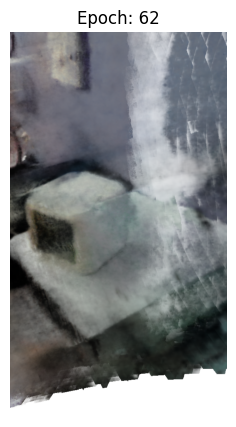

loss=0.0762 (0.0492), lr=0.003990: : 100% 19/19 [00:01<00:00, 14.42it/s]


KeyboardInterrupt: 

In [ ]:
# @title Start Training
torch.cuda.empty_cache()
if opt.O:
    opt.fp16 = True
    opt.cuda_ray = True
    opt.preload = True

if opt.patch_size > 1:
    opt.error_map = False # do not use error_map if use patch-based training
    # assert opt.patch_size > 16, "patch_size should > 16 to run LPIPS loss."
    assert opt.num_rays % (opt.patch_size ** 2) == 0, "patch_size ** 2 should be dividable by num_rays."


if opt.ff:
    opt.fp16 = True
    assert opt.bg_radius <= 0, "background model is not implemented for --ff"
    from nerf.network_ff import NeRFNetwork
elif opt.tcnn:
    opt.fp16 = True
    assert opt.bg_radius <= 0, "background model is not implemented for --tcnn"
    from nerf.network_tcnn import NeRFNetwork
else:
    from nerf.network import NeRFNetwork

print(opt)

seed_everything(opt.seed)

model = NeRFNetwork(
    encoding="hashgrid",
    bound=opt.bound,
    cuda_ray=opt.cuda_ray,
    density_scale=1,
    min_near=opt.min_near,
    density_thresh=opt.density_thresh,
    bg_radius=opt.bg_radius,
)

print(model)

criterion = torch.nn.MSELoss(reduction='none')
#criterion = partial(huber_loss, reduction='none')
#criterion = torch.nn.HuberLoss(reduction='none', beta=0.1) # only available after torch 1.10 ?

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if opt.test:

    metrics = [PSNRMeter(), LPIPSMeter(device=device)]
    trainer = Trainer('ngp', opt, model, device=device, workspace=opt.workspace, criterion=criterion, fp16=opt.fp16, metrics=metrics, use_checkpoint=opt.ckpt)

    if opt.gui:
        gui = NeRFGUI(opt, trainer)
        gui.render()

    else:
        test_loader = NeRFDataset(opt, device=device, type='test').dataloader()

        if test_loader.has_gt:
            trainer.evaluate(test_loader) # blender has gt, so evaluate it.

        trainer.test(test_loader, write_video=True) # test and save video

        trainer.save_mesh(resolution=256, threshold=10)

else:

    optimizer = lambda model: torch.optim.Adam(model.get_params(opt.lr), betas=(0.9, 0.99), eps=1e-15)

    train_loader = NeRFDataset(opt, device=device, type='train').dataloader()

    # decay to 0.1 * init_lr at last iter step
    scheduler = lambda optimizer: optim.lr_scheduler.LambdaLR(optimizer, lambda iter: 0.1 ** min(iter / opt.iters, 1))

    metrics = [PSNRMeter(), LPIPSMeter(device=device)]
    trainer = Trainer('ngp', opt, model, device=device, workspace=opt.workspace, optimizer=optimizer, criterion=criterion, ema_decay=0.95, fp16=opt.fp16, lr_scheduler=scheduler, scheduler_update_every_step=True, metrics=metrics, use_checkpoint=opt.ckpt, eval_interval=50,mute=True)

    if opt.gui:
        gui = NeRFGUI(opt, trainer, train_loader)
        gui.render()

    else:
        valid_loader = NeRFDataset(opt, device=device, type='val', downscale=1).dataloader()
        # also test
        test_loader = NeRFDataset(opt, device=device, type='test').dataloader()

        max_epoch = np.ceil(opt.iters / len(train_loader)).astype(np.int32)
        print(f"MAX EPOCH={max_epoch}")
        trainer.train(train_loader, valid_loader, max_epoch)


        if test_loader.has_gt:
            trainer.evaluate(test_loader) # blender has gt, so evaluate it.

        trainer.test(test_loader, write_video=True) # test and save video

        trainer.save_mesh(resolution=256, threshold=10)

In [ ]:
# @title Visualize Mesh
trainer.save_mesh(resolution=256, threshold=10)
import open3d as o3d
import glob
import numpy as np
import plotly.graph_objects as go
import pymeshlab as pml

mesh_path=glob.glob(os.path.join('/content/torch-ngp-col',workspace_name,'meshes/*.ply'))[0]
ms=pml.MeshSet()
ms.load_new_mesh(mesh_path)
ms.apply_filter('meshing_remove_connected_component_by_diameter')

mesh_c_path='/content/processed_mesh.ply'
ms.save_current_mesh(mesh_c_path)

print(f"Loading mesh from {mesh_path}...")
mesh = o3d.io.read_triangle_mesh(mesh_c_path)



if not mesh.has_vertex_normals(): mesh.compute_vertex_normals()
if not mesh.has_triangle_normals(): mesh.compute_triangle_normals()

triangles = np.asarray(mesh.triangles)
vertices = np.asarray(mesh.vertices)
colors = None
if mesh.has_triangle_normals():
    colors = (0.5, 0.5, 0.5) + np.asarray(mesh.triangle_normals) * 0.5
    colors = tuple(map(tuple, colors))
else:
    colors = (1.0, 0.0, 0.0)

# mesh.paint_traingle_color(colors)
# mesh.triangle.colors = o3d.core.Tensor(colors)
# fig = go.Figure(
#     data=[
#         go.Mesh3d(
#             x=vertices[:,0],
#             y=vertices[:,1],
#             z=vertices[:,2],
#             i=triangles[:,0],
#             j=triangles[:,1],
#             k=triangles[:,2],
#             facecolor=colors,
#             opacity=0.50)
#     ],
#     layout=dict(
#         scene=dict(
#             xaxis=dict(visible=False),
#             yaxis=dict(visible=False),
#             zaxis=dict(visible=False)
#         )
#     )
# )
# fig.show()
o3d.visualization.draw_plotly([mesh])

In [ ]:
import ipywidgets as widgets
from google.colab.patches import cv2_imshow

phi_slider=    widgets.FloatSlider(
    value=7.5,
    min=0,
    max=3.14,
    step=0.1,
    description='phi:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
theta_slider=    widgets.FloatSlider(
    value=7.5,
    min=0,
    max=1.07,
    step=0.1,
    description='theta:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
radius_slider=    widgets.FloatSlider(
    value=7.5,
    min=0.2,
    max=5.0,
    step=0.1,
    description='dist:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

# intrinsic=torch.tensor([proj[0,0],proj[1,1],proj[0,2],proj[1,2]]).cuda().to(torch.float64)
intrinsic=np.array([proj[0,0],proj[1,1],proj[0,2],proj[1,2]]).astype(np.float64)

set_val_rad=0
set_val_phi=0
set_val_theta=0

# coord_cam = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=[0, 0, 0])
# coord_cam_fixed = o3d.geometry.TriangleMesh.create_coordinate_frame(size=2.0, origin=[0, 0, 0])
train_loader = NeRFDataset(opt, device='cpu', type='train').dataloader()

intrinsic=intrinsic.astype(np.float32)
for data_tmp in train_loader:
    H,W=data_tmp['H'],data_tmp['W']
# while True:


    # if set_val_rad!=hemi_rad or set_val_phi!=phi or set_val_theta!=theta:


def update_func(phi,theta,rad):
    hemi_rad=rad
    view_pos=np.array([hemi_rad*np.sin(theta)*np.cos(phi),hemi_rad*np.cos(theta),hemi_rad*np.sin(theta)*np.sin(phi)])
    r_mv=rotation_translation_fix(view_pos)
    pose=((np.linalg.inv(r_mv))).astype(np.float64)
    pose=pose.astype(np.float32)

    outputs=trainer.test_gui(pose,intrinsic,W,H,downscale=0.5)
    # plot(0,outputs['image'])
    # cv2.imshow("img",outputs['image'])
    # cv2.waitKey(1)
    cv2_imshow(outputs['image'])


phi_interactive=widgets.interactive(update_func,phi=phi_slider,theta=theta_slider,rad=radius_slider)
display(phi_interactive)

Loading train data: 100%|██████████| 18/18 [00:00<00:00, 26.21it/s]


interactive(children=(FloatSlider(value=3.14, continuous_update=False, description='phi:', max=3.14, readout_f…